High performance python (iteration tools)
==============

In [ ]:
# %load /wrk/simon/scripts/python/functions/read_cwb.py
#!/usr/bin/env python
import pandas as pd
import numpy as np
import glob
def read_auto(file,cws=[6,11,7,7,7,7,7,7,7],nas=['-9991','-9996','-9997','-9998','-9999']):
      import pandas as pd
      df=pd.read_fwf(file,widths=cws,encoding='big5',header=0,skiprows=74,index_col=False,na_values=nas)
      return df
dpath='/archives/data/tw/dbahr/'
fpattern=''.join([dpath,'[0-9]*_auto_hr.txt'])
files=glob.glob(fpattern)

#reset affinity
import os
os.sched_getaffinity(0)
os.sched_setaffinity(0, {1, 3})
x = {i for i in range(10)}
os.sched_setaffinity(0, x)
os.sched_getaffinity(0)

In [ ]:
os.system("taskset -p 0xff %d" % os.getpid())
import multiprocessing
multiprocessing.cpu_count() 

Loop
------------

In [ ]:
%timeit for n,f in enumerate(files): read_auto(f)

List comprehensions
----------------

In [ ]:
#list comprehension
%timeit [read_auto(f) for f in files]

Vectorization
--------------

In [ ]:
vread_auto=np.vectorize(read_auto)
%timeit vread_auto(files)

Map
-------------

In [ ]:
%timeit list(map(read_auto,files))

Add more computation resources
---------------

In [ ]:
#start controller and register engines
import ipyparallel as ipp
#rc=ipp.Client('/home/notebook/.ipython/profile_profile1/security/ipcontroller-notebook1-client.json')
rc=ipp.Client()

In [ ]:
v = rc[:]#direct control of availiable engines
lv = rc.load_balanced_view()#load balancing

In [ ]:
v

In [ ]:
%timeit v.map_sync(read_auto,files)

In [ ]:
%timeit lv.map_sync(read_auto,files)

In [3]:
import sympy
pi = sympy.pi.evalf(40)
print pi
pi = sympy.pi.evalf(10000)
digits = (d for d in str(pi)[2:])  # create a sequence of digits
%timeit freqs = one_digit_freqs(digits)

3.141592653589793238462643383279502884197


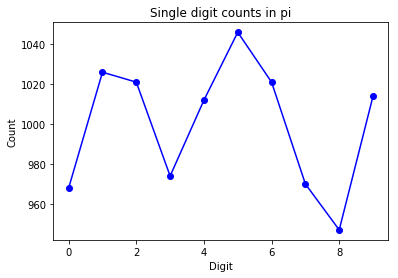

In [4]:
plot_one_digit_freqs(freqs)

In [17]:
#%run parallelpi.py

In [2]:
import sys
sys.path.insert(0,'C:\Users\STEMLabIBM\scripts\stemlab-ipypara')
from pidigits import *
import pidigits as libs

In [1]:
import ipyparallel as ipp
#rc=ipp.Client('/home/notebook/.ipython/profile_profile1/security/ipcontroller-notebook1-client.json')
rc=ipp.Client()
rc.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [3]:
#rc[:].run('./pidigits.py')

# the number of engines
n = len(rc)
id0 = rc.ids[0]
v = rc[:]
v.block=True
# Files with digits of pi (10m digits each)
filestring = 'pi200m.ascii.%(i)02dof20'
files = [filestring % {'i':i} for i in range(1,21)]
with v.sync_imports(fetch_pi_file):
    fetch_pi_file(files[0])

importing sys on engine(s)
importing os on engine(s)
importing urllib on engine(s)
importing _winreg on engine(s)
importing re on engine(s)
importing mimetypes on engine(s)
importing mimetools on engine(s)
importing StringIO from cStringIO on engine(s)
importing ftplib on engine(s)


IOError: [Errno ftp error] [Errno 10060] 連線嘗試失敗，因為連線對象有一段時間並未正確回應，或是連線建立失敗，因為連線的主機無法回應。

In [7]:
# fetch the pi-files
print("downloading %i files of pi"%n)
v.map(fetch_pi_file, files[:n])
print("done")

downloading 16 files of pi


CompositeError: one or more exceptions from call to method: fetch_pi_file
[0:apply]: ImportError: No module named pidigits
[1:apply]: ImportError: No module named pidigits
[2:apply]: ImportError: No module named pidigits
[3:apply]: ImportError: No module named pidigits
.... 12 more exceptions ...

In [23]:
fetch_pi_file(files[0])

IOError: [Errno ftp error] [Errno 10060] 連線嘗試失敗，因為連線對象有一段時間並未正確回應，或是連線建立失敗，因為連線的主機無法回應。

In [26]:
from matplotlib import pyplot

In [27]:
pyplot.plot

<function matplotlib.pyplot.plot>